In [67]:
import numpy as np 
import matplotlib.pyplot as plt 
import time
from torch import nn
import torch.nn.functional as F
import torch
from torchvision import datasets, transforms
from torch import optim
from collections import OrderedDict
import helper

In [68]:
transform = transforms.Compose([transforms.ToTensor(), 
                               transforms.Normalize((0.5), (0.5))])

trainset = datasets.FashionMNIST('F_MNIST_data', download=True, train=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)

testset = datasets.FashionMNIST('F_MNIST_data', download=True, train=False, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=64, shuffle=True)

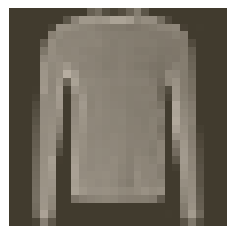

In [69]:
images, labels = next(iter(trainloader))
helper.imshow(images[1])


In [70]:
hidden_layer = [500, 200, 100, 50, 50]
hidden_layer = zip(hidden_layer[:-1], hidden_layer[1:])
for i in hidden_layer:
    print(i)

(500, 200)
(200, 100)
(100, 50)
(50, 50)


In [71]:
class Network(nn.Module):
    def __init__(self, input_size, hidden_size, output_size, drop_p=0.5):
        super().__init__()
        self.network_layer = nn.ModuleList([nn.Linear(input_size, hidden_size[0])])
        layer_sizes = zip(hidden_size[:-1], hidden_size[1:])
        self.network_layer.extend([nn.Linear(h1, h2) for h1, h2 in layer_sizes])
        self.output = nn.Linear(hidden_size[-1], output_size)
        self.dropout = nn.Dropout(p=drop_p)
    
    def forward(self, x):
        for linear_layer in self.network_layer:
            x = F.relu(linear_layer(x))
            x = self.dropout(x)
            
        x = self.output(x)
        
        return F.log_softmax(x, dim=1)

In [72]:
input_size = 784
hidden_size = [512, 256, 128]
output_size = 10
drop_p = 0.5
model = Network(input_size, hidden_size, output_size, drop_p)


In [73]:
criterion = nn.NLLLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)


In [ ]:
epochs = 3
print_every = 40
steps = 0
for e in range(epochs):
    runnings_loss = 0
    for images, labels in trainloader:
        steps += 1
        images.resize_(images.size()[0], input_size)
        optimizer.zero_grad()
        output = model.forward(images)
        loss = criterion(output, labels)
        loss.backward()
        optimizer.step()
        runnings_loss = loss.item()
        
        if steps % print_every == 0:
            print(f'epochs:{e+1}/{epochs}','loss:{:.4f}'.format(runnings_loss/print_every))
            runnings_loss = 0

epochs:1/3 loss:0.0345
epochs:1/3 loss:0.0245
epochs:1/3 loss:0.0232
epochs:1/3 loss:0.0162
epochs:1/3 loss:0.0186
epochs:1/3 loss:0.0214
epochs:1/3 loss:0.0151
epochs:1/3 loss:0.0207
epochs:1/3 loss:0.0152
epochs:1/3 loss:0.0279
epochs:1/3 loss:0.0156
epochs:1/3 loss:0.0183
epochs:1/3 loss:0.0232
epochs:1/3 loss:0.0179
epochs:1/3 loss:0.0145
epochs:1/3 loss:0.0156
epochs:1/3 loss:0.0154
epochs:1/3 loss:0.0126
epochs:1/3 loss:0.0152
epochs:1/3 loss:0.0072
epochs:1/3 loss:0.0179
epochs:1/3 loss:0.0148
epochs:1/3 loss:0.0131
epochs:2/3 loss:0.0141
epochs:2/3 loss:0.0213
epochs:2/3 loss:0.0120
epochs:2/3 loss:0.0112
epochs:2/3 loss:0.0111
epochs:2/3 loss:0.0125
epochs:2/3 loss:0.0148
epochs:2/3 loss:0.0152
epochs:2/3 loss:0.0131
epochs:2/3 loss:0.0070
epochs:2/3 loss:0.0124
epochs:2/3 loss:0.0122
epochs:2/3 loss:0.0146
epochs:2/3 loss:0.0070
epochs:2/3 loss:0.0123
epochs:2/3 loss:0.0122
epochs:2/3 loss:0.0158
epochs:2/3 loss:0.0152
epochs:2/3 loss:0.0183
epochs:2/3 loss:0.0139
epochs:2/3 